<a href="https://colab.research.google.com/github/luisfelipe100/PCD/blob/main/PCD_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Read the .txt file into a DataFrame
df = pd.read_csv("/content/BooksDatasetClean.csv")

# Display the first few rows
print(df.head())


                                               Title  \
0                                      Goat Brothers   
1                                 The Missing Person   
2                  Don't Eat Your Heart Out Cookbook   
3  When Your Corporate Umbrella Begins to Leak: A...   
4    Amy Spangler's Breastfeeding : A Parent's Guide   

                    Authors Description              Category  \
0          By Colton, Larry         NaN     History , General   
1        By Grumbach, Doris         NaN     Fiction , General   
2  By Piscatella, Joseph C.         NaN   Cooking , Reference   
3         By Davis, Paul D.         NaN                   NaN   
4          By Spangler, Amy         NaN                   NaN   

          Publisher  Price Starting With ($) Publish Date (Month)  \
0         Doubleday                     8.79              January   
1  Putnam Pub Group                     4.99                March   
2    Workman Pub Co                     4.99            September

In [ ]:
# Tomar solamente Description y Category. Eliminar nulos.
df = df[["Description", "Category"]].dropna()

In [ ]:
print(df.head())

                                          Description  \
7   Collects poems written by the eleven-year-old ...   
8   The Russian author offers an affectionate chro...   
10  A humor classic, this tongue-in-cheek diet pla...   
11  Deadly germs sprayed in shopping malls, bomb-l...   
13  "The Bible and the social and moral consequenc...   

                                        Category  
7                               Poetry , General  
8            Biography & Autobiography , General  
10   Health & Fitness , Diet & Nutrition , Diets  
11   Technology & Engineering , Military Science  
13       Religion , Biblical Biography , General  


In [ ]:
# Extract the first category (before the first comma)
df["First_Category"] = df["Category"].str.split(" , ").str[0]
print(df.head())

                                          Description  \
7   Collects poems written by the eleven-year-old ...   
8   The Russian author offers an affectionate chro...   
10  A humor classic, this tongue-in-cheek diet pla...   
11  Deadly germs sprayed in shopping malls, bomb-l...   
13  "The Bible and the social and moral consequenc...   

                                        Category              First_Category  
7                               Poetry , General                      Poetry  
8            Biography & Autobiography , General   Biography & Autobiography  
10   Health & Fitness , Diet & Nutrition , Diets            Health & Fitness  
11   Technology & Engineering , Military Science    Technology & Engineering  
13       Religion , Biblical Biography , General                    Religion  


In [ ]:
df['First_Category'].value_counts()

,count
First_Category,
Fiction,17721
Juvenile Fiction,6437
Religion,3461
Cooking,2890
Juvenile Nonfiction,2665
Business & Economics,2538
Biography & Autobiography,2119
History,2043
Political Science,1850


In [ ]:
# Keep only categories with more than 1000 count.
df = df[df['First_Category'].map(df['First_Category'].value_counts()) > 1000]

In [ ]:
df["First_Category"] = df["First_Category"].str.strip()  # Remove leading/trailing spaces

# Remove Fiction categories.
df = df[~df["First_Category"].isin(["Fiction", "Juvenile Fiction", "Young Adult Fiction", "Juvenile Nonfiction"])]


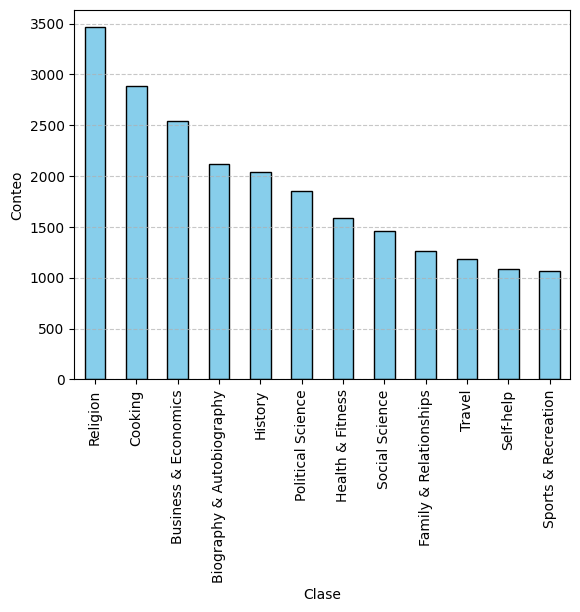

In [ ]:
import matplotlib.pyplot as plt

# Get the frequency table
class_counts = df['First_Category'].value_counts()

# Plot the bar chart

class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.xlabel("Clase")
plt.ylabel("Conteo")
plt.xticks(rotation=90)  # Rotate x labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
X, y = df['Description'], df['First_Category']

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("punkt_tab")
nltk.download("stopwords")

def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return " ".join(stemmed_tokens)

X_preprocessed = [preprocess_text(text) for text in X]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_preprocessed, y)

# label encode the target variable
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)


In [ ]:
# create a count vectorizer object
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_preprocessed)

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_preprocessed)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X_preprocessed)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X_preprocessed)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)


NB, Count Vectors:  0.7367021276595744
NB, WordLevel TF-IDF:  0.7180851063829787
NB, N-Gram Vectors:  0.5914893617021276
NB, CharLevel Vectors:  0.6602836879432624


In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)


LR, Count Vectors:  0.7141843971631205
LR, WordLevel TF-IDF:  0.7489361702127659
LR, N-Gram Vectors:  0.600354609929078
LR, CharLevel Vectors:  0.723758865248227


In [ ]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)


SVM, N-Gram Vectors:  0.5796099290780142


In [ ]:
# SVM on Count Vectors
accuracy = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print("SVM, Count Vectors: ", accuracy)

SVM, Count Vectors:  0.7187943262411347


In [ ]:
# SVM on Word Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM, WordLevel TF-IDF: ", accuracy)

SVM, WordLevel TF-IDF:  0.7547872340425532


In [ ]:
# SVM on Character Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("SVM, CharLevel Vectors: ", accuracy)

SVM, CharLevel Vectors:  0.7322695035460993


In [ ]:
import joblib

svm_model = svm.SVC(probability=True)  # Habilita la estimación de probabilidades
svm_model.fit(xtrain_tfidf, train_y)

# Guardar el modelo con probabilidades activadas
joblib.dump(svm_model, "modelo_svm.pkl")

joblib.dump(tfidf_vect, "tfidf_vectorizer.pkl")  # Guarda el vectorizador
joblib.dump(encoder, "label_encoder.pkl")  # Guarda el codificador de etiquetas

print("Modelo guardado exitosamente.")


Modelo guardado exitosamente.
